In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [6]:
# Import the requests library.
import requests

#Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=04dea480d5e90a2d96afcfa60384e463


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dandong
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | esso
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | castro
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | maceio
Processing Record 8 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 9 of Set 1 | saint-francois
Processing Record 10 of Set 1 | yeniseysk
Processing Record 11 of Set 1 | khatanga
Processing Record 12 of Set 1 | sistranda
Processing Record 13 of Set 1 | kodiak
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | monroe
Processing Record 16 of Set 1 | aykhal
Processing Record 17 of Set 1 | guerrero negro
Processing Record 18 of Set 1 | kavieng
Processing Record 19 of Set 1 | zambezi
Processing Record 20 of Set 1 | qaanaaq
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Set 1 | odweyne
City not found. Skippi

Processing Record 39 of Set 4 | the valley
Processing Record 40 of Set 4 | muskegon
Processing Record 41 of Set 4 | airai
Processing Record 42 of Set 4 | ostrovnoy
Processing Record 43 of Set 4 | demba
Processing Record 44 of Set 4 | cockburn town
Processing Record 45 of Set 4 | pathein
Processing Record 46 of Set 4 | sao raimundo nonato
City not found. Skipping...
Processing Record 47 of Set 4 | novyy urgal
Processing Record 48 of Set 4 | kita
Processing Record 49 of Set 4 | katsuura
Processing Record 50 of Set 4 | linxia
Processing Record 1 of Set 5 | cadillac
Processing Record 2 of Set 5 | camargo
Processing Record 3 of Set 5 | souillac
Processing Record 4 of Set 5 | sabang
Processing Record 5 of Set 5 | zhireken
Processing Record 6 of Set 5 | nola
Processing Record 7 of Set 5 | faanui
Processing Record 8 of Set 5 | norman wells
Processing Record 9 of Set 5 | lebork
Processing Record 10 of Set 5 | sedalia
Processing Record 11 of Set 5 | yellowknife
Processing Record 12 of Set 5 | ot

Processing Record 25 of Set 8 | santo antonio de jesus
Processing Record 26 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 27 of Set 8 | hami
Processing Record 28 of Set 8 | batemans bay
Processing Record 29 of Set 8 | ostersund
Processing Record 30 of Set 8 | sao filipe
Processing Record 31 of Set 8 | macau
Processing Record 32 of Set 8 | vallenar
Processing Record 33 of Set 8 | ambodifototra
City not found. Skipping...
Processing Record 34 of Set 8 | ust-nera
Processing Record 35 of Set 8 | moranbah
Processing Record 36 of Set 8 | yar-sale
Processing Record 37 of Set 8 | port augusta
Processing Record 38 of Set 8 | vila
Processing Record 39 of Set 8 | maymyo
Processing Record 40 of Set 8 | escarcega
Processing Record 41 of Set 8 | gallup
Processing Record 42 of Set 8 | tessalit
Processing Record 43 of Set 8 | ekibastuz
Processing Record 44 of Set 8 | kananga
Processing Record 45 of Set 8 | coahuayana
Processing Record 46 of Set 8 | chicama
Processing Record 47

City not found. Skipping...
Processing Record 11 of Set 12 | glens falls
Processing Record 12 of Set 12 | viedma
Processing Record 13 of Set 12 | sibolga
Processing Record 14 of Set 12 | sakakah
City not found. Skipping...
Processing Record 15 of Set 12 | kontagora
Processing Record 16 of Set 12 | bhuban
Processing Record 17 of Set 12 | gamba
Processing Record 18 of Set 12 | los llanos de aridane
Processing Record 19 of Set 12 | grajau
City not found. Skipping...
Processing Record 20 of Set 12 | ixtapa
Processing Record 21 of Set 12 | northam
Processing Record 22 of Set 12 | abbeville
Processing Record 23 of Set 12 | wuwei
Processing Record 24 of Set 12 | sechura
Processing Record 25 of Set 12 | yamada
Processing Record 26 of Set 12 | graham
Processing Record 27 of Set 12 | meulaboh
Processing Record 28 of Set 12 | tubruq
City not found. Skipping...
Processing Record 29 of Set 12 | voyinka
Processing Record 30 of Set 12 | tual
Processing Record 31 of Set 12 | abay
Processing Record 32 

In [9]:
len(city_data)

552

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dandong,40.12,124.37,17.40,66,97,14.56,CN,2019-12-30 01:16:57
1,Punta Arenas,-53.16,-70.91,55.40,47,0,11.41,CL,2019-12-30 01:17:02
2,Esso,55.93,158.70,-2.15,84,71,3.06,RU,2019-12-30 01:18:43
3,Rikitea,-23.12,-134.97,77.38,76,94,8.55,PF,2019-12-30 01:17:02
4,Castro,-42.48,-73.76,55.40,76,20,4.70,CL,2019-12-30 01:16:58
5,Albany,42.65,-73.75,36.00,80,90,4.70,US,2019-12-30 01:15:16
6,Maceio,-9.67,-35.74,77.00,83,100,3.36,BR,2019-12-30 01:22:35
7,Saint-Francois,46.42,3.91,36.00,85,90,5.82,FR,2019-12-30 01:17:35
8,Yeniseysk,58.45,92.17,-16.53,93,100,2.15,RU,2019-12-30 01:22:35
9,Khatanga,71.98,102.47,-29.88,96,90,6.89,RU,2019-12-30 01:17:52


In [11]:
# new column order
new_column_order = ["City","Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dandong,CN,2019-12-30 01:16:57,40.12,124.37,17.40,66,97,14.56
1,Punta Arenas,CL,2019-12-30 01:17:02,-53.16,-70.91,55.40,47,0,11.41
2,Esso,RU,2019-12-30 01:18:43,55.93,158.70,-2.15,84,71,3.06
3,Rikitea,PF,2019-12-30 01:17:02,-23.12,-134.97,77.38,76,94,8.55
4,Castro,CL,2019-12-30 01:16:58,-42.48,-73.76,55.40,76,20,4.70
...,...,...,...,...,...,...,...,...,...
547,Windhoek,NA,2019-12-30 01:24:58,-22.57,17.08,68.00,72,53,1.12
548,Mandalgovi,MN,2019-12-30 01:24:58,45.76,106.27,-19.23,75,0,4.07
549,Anadyr,RU,2019-12-30 01:24:58,64.73,177.51,-25.01,74,40,13.42
550,Bartoszyce,PL,2019-12-30 01:24:58,54.25,20.81,32.74,69,100,14.23


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

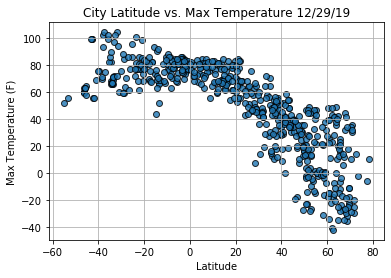

In [14]:
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

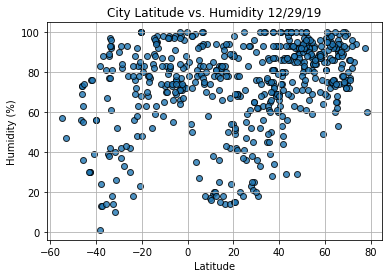

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

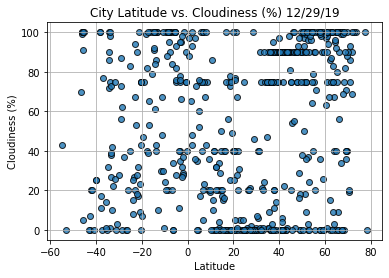

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

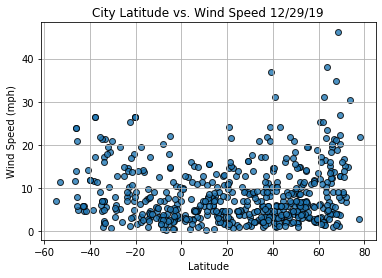

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [19]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    print(r_value)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

-0.8165328219522772


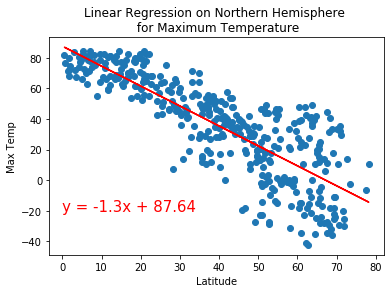

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       "Linear Regression on Northern Hemisphere \n for Maximum Temperature",
                       "Max Temp", (0,-20))


0.14876496734847228


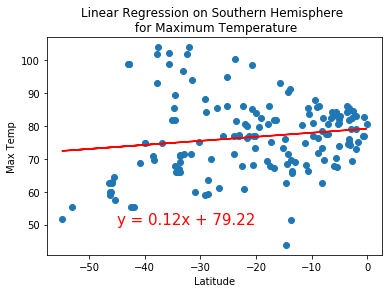

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       "Linear Regression on Southern Hemisphere \n for Maximum Temperature",
                       "Max Temp", (-45,50))

0.3603517737927475


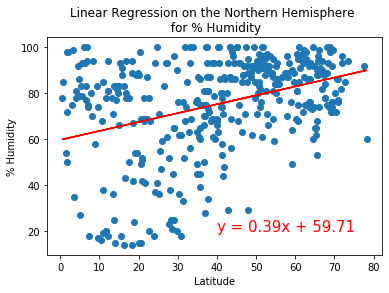

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity',
                       '% Humidity',(40,20))

0.4425941162368813


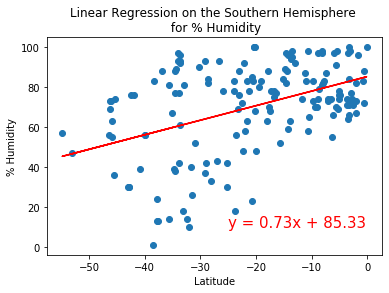

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity',
                       '% Humidity',(-25,10))

0.32104992630876006


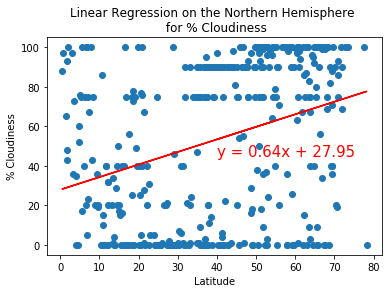

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',(40,45))

0.23048740807288617


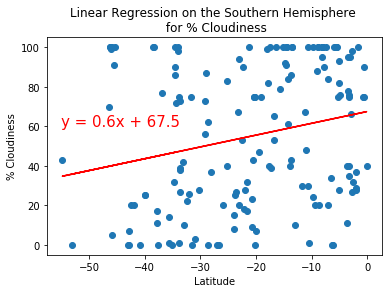

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',(-55,60))

0.22824970024438196


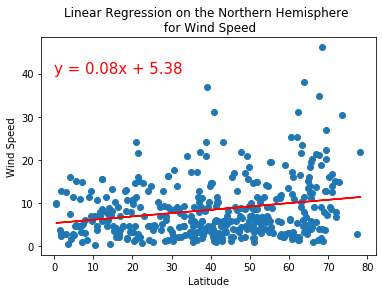

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 
                       'Wind Speed',(0,40))

-0.31918961812699154


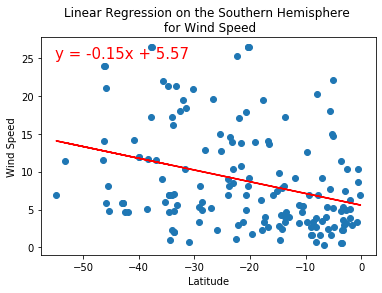

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 
                       'Wind Speed',(-55,25))